In [1]:
from random import randrange
import random
import math
import matplotlib.pyplot as plt

In [2]:
def tabuleiro(N, Q):
  tabuleiros = []
  for i in range(Q):
    tabuleiro = []
    for i in range(N): #para cada coluna do tabuleiro
      tabuleiro.append(randrange(N)) #Ele colocará a rainha em uma linha aleatória da coluna
    tabuleiros.append(tabuleiro) #ele colocará o tabuleiro na lista de tabuleiros
  return tabuleiros

def todosVizinhos(T):
  vizinhos = []
  for i in range(len(T)):
    tabuleiro = T.copy()
    for j in range(len(T)):
      if (T[i] != j):
        tabuleiro[i] = j
        vizinhos.append(tabuleiro.copy())#sempre que trabalhar com listas, é necessário se atentar a fazer cópias da lista, e não só criar duas variáveis apontando pro mesmo endereço
  return vizinhos

def umVizinho(T):
  vizinhos = todosVizinhos(T)
  return vizinhos[randrange(len(vizinhos))]

def numeroAtaques(T):
  n = len(T)
  contador = 0
  for i in range(n):
    for j in range(i+1, n):
      if(T[i] == T[j] or (abs(T[i]-T[j]) == abs(i-j))):
        contador += 1
  return contador

tab = tabuleiro(32,1)[0]

def SimulatedAnnealing(iter, Temp, a): #como visto no slide
  EC = tab
  print("estado inicial",EC)
  ME = EC.copy()
  TC = Temp
  x = []
  y = []
  it = 0
  trocasMelhores = 0
  manterIgual = 0
  trocasAleatorias = 0
  for i in range(iter):
    vizinho = umVizinho(EC)
    delta = numeroAtaques(vizinho) - numeroAtaques(EC)
    if(delta <= 0):
      EC = vizinho.copy() #tem q fazer a copia, se n eles apontam pro mesmo endereço
      if(delta < 0):
        trocasMelhores += 1
      else:
        manterIgual += 1
      if(numeroAtaques(vizinho) < numeroAtaques(ME)):
        ME = vizinho.copy()
        it = i;
    else:
      if(math.exp((-delta)/TC) > random.uniform(0, 1)):
        print("nó corrente:", EC,"próximo nó", vizinho, "probabilidade de troca", math.exp((-delta)/TC))
        EC = vizinho.copy()
        trocasAleatorias += 1
      else:
        manterIgual += 1
    TC = a*TC
    x.append(i)
    y.append(numeroAtaques(EC))
  plt.plot(x,y)
  print("----------------------------------------")
  print("O melhor estado foi", ME, "na iteração", it)
  print("com", numeroAtaques(ME),"possiveis ataques")
  print("O algoritmo realizou", trocasMelhores, "trocas para um estado melhor")
  print("O algoritmo realizou", trocasAleatorias, "trocas pra um estado aleatorio")
  print("O algoritmo se manteve no estado corrente", manterIgual, "vezes")
  return ME,numeroAtaques(ME)



estado inicial [20, 16, 10, 16, 28, 4, 13, 4, 24, 7, 5, 7, 27, 26, 13, 24, 29, 5, 9, 29, 16, 12, 14, 24, 29, 21, 30, 14, 19, 5, 12, 7]
nó corrente: [20, 16, 10, 16, 28, 4, 3, 4, 24, 7, 5, 7, 27, 26, 13, 24, 29, 5, 9, 29, 16, 12, 14, 24, 29, 21, 30, 14, 19, 5, 12, 7] próximo nó [20, 16, 10, 16, 28, 4, 3, 4, 24, 7, 5, 7, 27, 26, 13, 24, 29, 13, 9, 29, 16, 12, 14, 24, 29, 21, 30, 14, 19, 5, 12, 7] probabilidade de troca 0.9780228724846005
nó corrente: [20, 2, 10, 1, 28, 4, 3, 4, 24, 7, 5, 7, 11, 26, 14, 24, 29, 13, 28, 29, 16, 12, 14, 24, 30, 13, 30, 14, 19, 2, 12, 25] próximo nó [20, 2, 10, 1, 28, 4, 3, 8, 24, 7, 5, 7, 11, 26, 14, 24, 29, 13, 28, 29, 16, 12, 14, 24, 30, 13, 30, 14, 19, 2, 12, 25] probabilidade de troca 0.9686360263519526
nó corrente: [20, 2, 10, 1, 28, 4, 3, 8, 24, 7, 5, 7, 11, 26, 14, 24, 29, 13, 28, 29, 16, 12, 14, 24, 30, 13, 30, 14, 19, 2, 12, 25] próximo nó [20, 2, 10, 1, 3, 4, 3, 8, 24, 7, 5, 7, 11, 26, 14, 24, 29, 13, 28, 29, 16, 12, 14, 24, 30, 13, 30, 14, 19, 2,

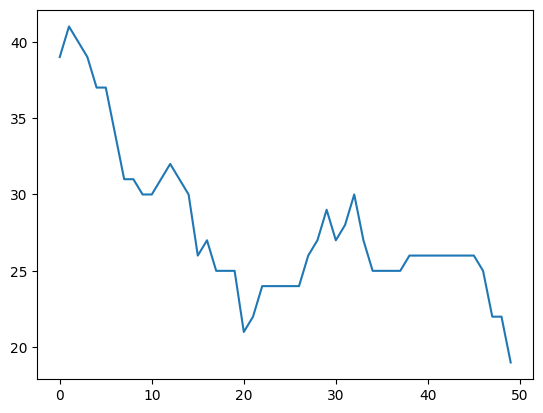

In [3]:
ME,NA = SimulatedAnnealing(50, 100, 0.9)